In [48]:
#import Libraries
import pandas as pd
import numpy as np
import os
import plotly .express as px

## DEFINE AND CREATE PATH

In [51]:
# Get working directory
current_dir = os.getcwd()

# Go one directory up to the root directory
project_root_dir = os.path.dirname(current_dir)

# Define paths to the data folder
data_dir = os.path.join(project_root_dir, 'data')
raw_dir = os.path.join(data_dir, 'raw')
processed_dir = os.path.join(data_dir, 'processed')

# Define paths to results folder
results_dir = os.path.join(project_root_dir, 'results')

# Define paths to docs folder
docs_dir = os.path.join(project_root_dir, 'docs')

# Create directories if they do not exist
os.makedirs(raw_dir, exist_ok = True)
os.makedirs(processed_dir, exist_ok = True)
os.makedirs(results_dir, exist_ok = True)
os.makedirs(docs_dir, exist_ok = True)

# READ IN DATA

In [54]:
adult_data_filename = os.path.join(processed_dir,'adult_cleaned.csv')
adult_df = pd.read_csv(adult_data_filename,na_values = '?',skipinitialspace = True)
adult_df.head(10)

,age,workclass,fnlwgt,education_num,marital_status,relationship,race,sex,capital_gain,capital_loss,hours_per_week,income,education_level,occupation_grouped,native_region,age_group
0,39,government,77516,13,single,single,white,male,2174,0,40,<=50k,tertiary,white collar,north america,36-45
1,50,self-employed,83311,13,married,male spouse,white,male,0,0,13,<=50k,tertiary,white collar,north america,46-60
2,38,private,215646,9,divorced or separated,single,white,male,0,0,40,<=50k,high school graduate,blue collar,north america,36-45
3,53,private,234721,7,married,male spouse,black,male,0,0,40,<=50k,secondary,blue collar,north america,46-60
4,28,private,338409,13,married,female spouse,black,female,0,0,40,<=50k,tertiary,white collar,central america,26-35
5,37,private,284582,14,married,female spouse,white,female,0,0,40,<=50k,tertiary,white collar,north america,36-45
6,49,private,160187,5,devorced or separated,single,black,female,0,0,16,<=50k,secondary,service,central america,46-60
7,52,self-employed,209642,9,married,male spouse,white,male,0,0,45,>50k,high school graduate,white collar,north america,46-60
8,31,private,45781,14,single,single,white,female,14084,0,50,>50k,tertiary,white collar,north america,26-35
9,42,private,159449,13,married,male spouse,white,male,5178,0,40,>50k,tertiary,white collar,north america,36-45


# check the shape of the dataset and th edatatypes

In [57]:
adult_df.shape

(32516, 16)

In [59]:
adult_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32516 entries, 0 to 32515
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 32516 non-null  int64 
 1   workclass           30680 non-null  object
 2   fnlwgt              32516 non-null  int64 
 3   education_num       32516 non-null  int64 
 4   marital_status      32516 non-null  object
 5   relationship        32516 non-null  object
 6   race                32516 non-null  object
 7   sex                 32516 non-null  object
 8   capital_gain        32516 non-null  int64 
 9   capital_loss        32516 non-null  int64 
 10  hours_per_week      32516 non-null  int64 
 11  income              32516 non-null  object
 12  education_level     32516 non-null  object
 13  occupation_grouped  30673 non-null  object
 14  native_region       31935 non-null  object
 15  age_group           32516 non-null  object
dtypes: int64(6), object(10

# Summary Statistics

In [62]:
adult_df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32516.000000,3.251600e+04,32516.000000,32516.000000,32516.000000,32516.000000
mean,38.589894,1.897969e+05,10.081714,1079.140239,87.424652,40.441075
std,13.639134,1.055749e+05,2.571947,7390.291963,403.225868,12.349640
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178330e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [64]:
adult_df.describe(include='object')

,workclass,marital_status,relationship,race,sex,income,education_level,occupation_grouped,native_region,age_group
count,30680,32516,32516,32516,32516,32516,32516,30673,31935,32516
unique,7,5,5,5,2,2,7,5,5,7
top,private,married,male spouse,white,male,<=50k,high school graduate,white collar,north america,26-35
freq,22652,14985,13179,27774,21759,24679,10484,12885,30021,8502


In [66]:
adult_df['workclass'].value_counts(normalize=True)

workclass
private          0.738331
self-employed    0.119166
local-gov        0.068220
government       0.042308
federal-gov      0.031291
voluntary        0.000456
unemployed       0.000228
Name: proportion, dtype: float64

In [68]:
adult_df['marital_status'].value_counts(normalize=True)

marital_status
married                  0.460850
single                   0.327716
divorced or separated    0.168040
widowed                  0.030539
devorced or separated    0.012855
Name: proportion, dtype: float64

In [70]:
adult_df['relationship'].value_counts(normalize=True)

relationship
male spouse          0.405308
single               0.360715
child                0.155585
female spouse        0.048222
extended relative    0.030170
Name: proportion, dtype: float64

In [72]:
adult_df['race'].value_counts(normalize=True)

race
white                 0.854164
black                 0.096014
asian-pac-islander    0.031923
amer-indian-eskimo    0.009565
other                 0.008334
Name: proportion, dtype: float64

# Income Distribution

In [79]:
adult_df_income = adult_df.groupby('income').size().reset_index(name = 'total')
adult_df_income

,income,total
0,<=50k,24679
1,>50k,7837


In [81]:
import os
import plotly.express as px

# Pie chart
fig = px.pie(adult_df_income, names='income', values='total', title='Overall Distribution')
fig.update_layout(template='presentation', paper_bgcolor='rgb(0, 0, 0)', plot_bgcolor='rgb(0, 0, 0)')
fig.show()

# Save in multiple formats
fig.write_image(os.path.join(results_dir, 'income_distribution_pie_chart.jpg'))
fig.write_image(os.path.join(results_dir, 'income_distribution_pie_chart.png'))
fig.write_html(os.path.join(results_dir, 'income_distribution_pie_chart.html'))


# Income by Age Group

In [84]:
adult_df_income_age = adult_df.groupby(['age_group', 'income']).size().reset_index(name='total_by_age').sort_values(['age_group','income'],ascending = True)
adult_df_income_age

,age_group,income,total_by_age
0,18-25,<=50k,5334
1,18-25,>50k,114
2,26-35,<=50k,6911
3,26-35,>50k,1591
4,36-45,<=50k,5230
5,36-45,>50k,2771
6,46-60,<=50k,4479
7,46-60,>50k,2810
8,61-75,<=50k,1580
9,61-75,>50k,511


In [86]:
total_per_group = adult_df_income_age.groupby('age_group').size()
total_per_group

age_group
18-25    2
26-35    2
36-45    2
46-60    2
61-75    2
76+      2
<18      1
dtype: int64

In [88]:
total_per_group = adult_df_income_age.groupby('age_group')['total_by_age'].transform('sum')
total_per_group

0     5448
1     5448
2     8502
3     8502
4     8001
5     8001
6     7289
7     7289
8     2091
9     2091
10     240
11     240
12     945
Name: total_by_age, dtype: int64

In [90]:
total_per_group = adult_df_income_age.groupby('age_group')['total_by_age'].transform('sum')
adult_df_income_age['percentage'] = (adult_df_income_age['total_by_age']/total_per_group) * 100
adult_df_income_age

,age_group,income,total_by_age,percentage
0,18-25,<=50k,5334,97.907489
1,18-25,>50k,114,2.092511
2,26-35,<=50k,6911,81.286756
3,26-35,>50k,1591,18.713244
4,36-45,<=50k,5230,65.366829
5,36-45,>50k,2771,34.633171
6,46-60,<=50k,4479,61.448758
7,46-60,>50k,2810,38.551242
8,61-75,<=50k,1580,75.561932
9,61-75,>50k,511,24.438068


In [92]:
fig= px.bar(
    adult_df_income_age,
    x = 'age_group',
    y = 'percentage',
    color= 'income',
    title='Income Distribution by age Group(%)',
    barmode = 'group',
    height=500,
    text= 'percentage',
    color_discrete_sequence=px.colors.sequential.RdBu,
)
fig.update_traces(texttemplate='%{text:.2f}%')
fig.update_traces(textposition='outside')
fig.update_layout(template='presentation', paper_bgcolor='rgb(0, 0, 0)', plot_bgcolor='rgb(0, 0, 0)')

# Save in multiple formats
fig.write_image(os.path.join(results_dir, 'income_distribution_by_agegroupbar.jpg'))
fig.write_image(os.path.join(results_dir, 'income_distribution_by_agegroupbar.png'))
fig.write_html(os.path.join(results_dir, 'income_distribution_by_agegroupbar.html'))

fig.show()



In [93]:
themes = ["plotly", "plotly_white", "plotly_dark", "ggplot2", "seaborn", "simple_white", "presentation", "xgridoff", "ygridoff", "gridon", "none"]

for theme in themes:
    fig.update_layout(template=theme)
fig.show()

In [94]:
adult_df_income_native_region = adult_df.groupby(['native_region', 'income']).size().reset_index(name='total_income_distr')
adult_df_income_native_region

,native_region,income,total_income_distr
0,asia,<=50k,465
1,asia,>50k,206
2,central america,<=50k,466
3,central america,>50k,58
4,europe,<=50k,369
5,europe,>50k,152
6,north america,<=50k,22770
7,north america,>50k,7251
8,south america,<=50k,174
9,south america,>50k,24


In [95]:
total_per_region = adult_df_income_native_region.groupby('native_region')['total_income_distr'].transform('sum')
adult_df_income_native_region['percentage'] = (adult_df_income_native_region['total_income_distr']/total_per_region) * 100
adult_df_income_native_region

,native_region,income,total_income_distr,percentage
0,asia,<=50k,465,69.299553
1,asia,>50k,206,30.700447
2,central america,<=50k,466,88.931298
3,central america,>50k,58,11.068702
4,europe,<=50k,369,70.825336
5,europe,>50k,152,29.174664
6,north america,<=50k,22770,75.846907
7,north america,>50k,7251,24.153093
8,south america,<=50k,174,87.878788
9,south america,>50k,24,12.121212


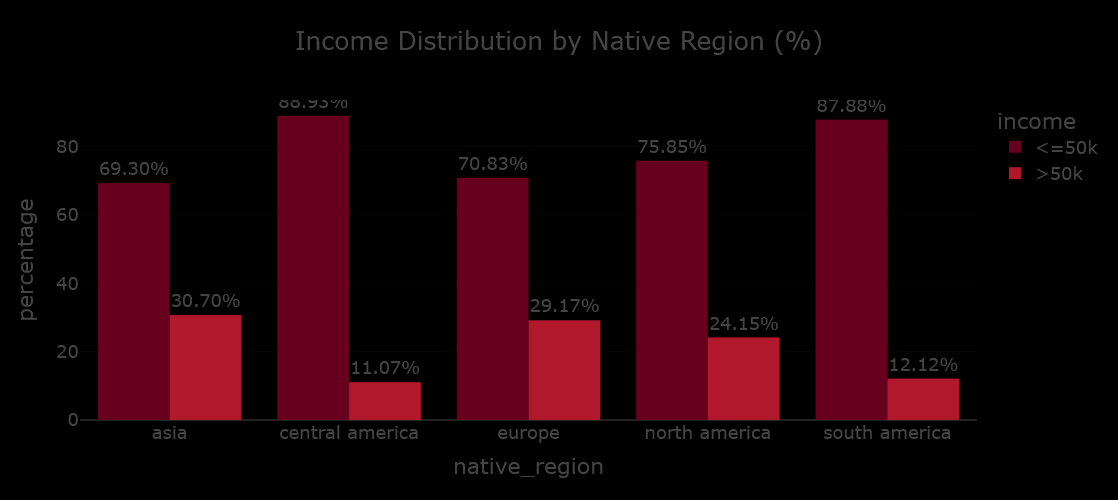

In [98]:
import plotly.express as px

# Plot the bar chart
fig = px.bar(
    adult_df_income_native_region,
    x='native_region',
    y='percentage',
    color='income',
    title='Income Distribution by Native Region (%)',
    barmode='group',
    height=500,
    color_discrete_sequence=px.colors.sequential.RdBu,
    text='percentage'
)

# Format the text on bars
fig.update_traces(texttemplate='%{text:.2f}%',)

fig.update_traces(textposition='outside')
fig.update_layout(template='presentation', paper_bgcolor='rgb(0, 0, 0)', plot_bgcolor='rgb(0, 0, 0)')

# Save in multiple formats
fig.write_image(os.path.join(results_dir, 'income_distribution_by_nativeregion_bar_plot.jpg'))
fig.write_image(os.path.join(results_dir, 'income_distribution_by_nativeregion_bar_plot.png'))
fig.write_html(os.path.join(results_dir, 'income_distribution_by_nativeregion_bar_plot.html'))


# Show the figure
fig.show()


In [99]:
adult_df_income_race = adult_df.groupby(['race', 'income']).size().reset_index(name='total_income_distr')
adult_df_income_race

,race,income,total_income_distr
0,amer-indian-eskimo,<=50k,275
1,amer-indian-eskimo,>50k,36
2,asian-pac-islander,<=50k,762
3,asian-pac-islander,>50k,276
4,black,<=50k,2735
5,black,>50k,387
6,other,<=50k,246
7,other,>50k,25
8,white,<=50k,20661
9,white,>50k,7113


In [100]:
total_per_race = adult_df_income_race.groupby('race')['total_income_distr'].transform('sum')
adult_df_income_race['percentage'] = (adult_df_income_race['total_income_distr']/total_per_race) * 100
adult_df_income_race

,race,income,total_income_distr,percentage
0,amer-indian-eskimo,<=50k,275,88.424437
1,amer-indian-eskimo,>50k,36,11.575563
2,asian-pac-islander,<=50k,762,73.410405
3,asian-pac-islander,>50k,276,26.589595
4,black,<=50k,2735,87.604100
5,black,>50k,387,12.395900
6,other,<=50k,246,90.774908
7,other,>50k,25,9.225092
8,white,<=50k,20661,74.389717
9,white,>50k,7113,25.610283


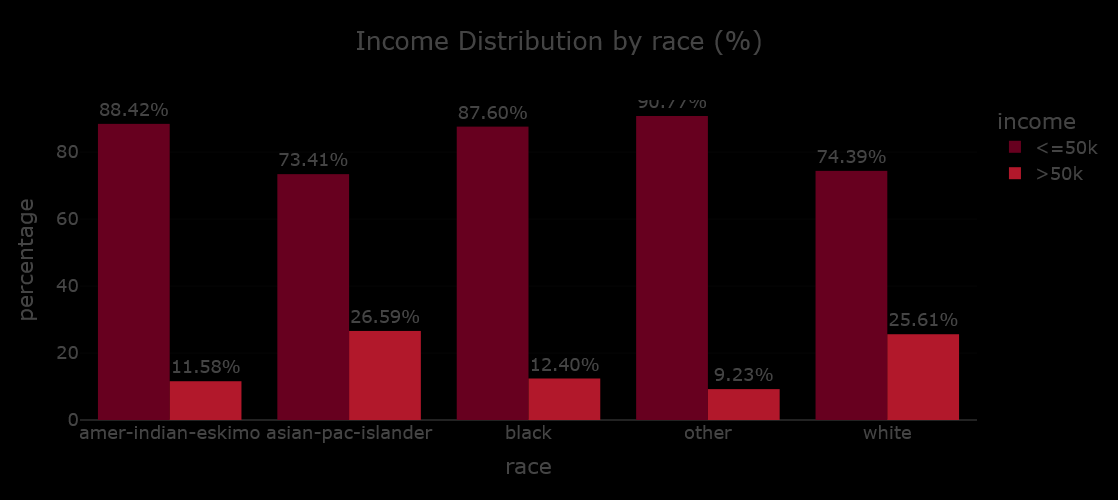

In [104]:
import plotly.express as px

# Plot the bar chart
fig = px.bar(
    adult_df_income_race,
    x='race',
    y='percentage',
    color='income',
    title='Income Distribution by race (%)',
    barmode='group',
    height=500,
    color_discrete_sequence=px.colors.sequential.RdBu,
    text='percentage'
)

# Format the text on bars
fig.update_traces(texttemplate='%{text:.2f}%',),
fig.update_traces(textposition='outside')

fig.update_layout(template='presentation', paper_bgcolor='rgb(0, 0, 0)', plot_bgcolor='rgb(0, 0, 0)')

# Save in multiple formats
fig.write_image(os.path.join(results_dir, 'income_distribution_by_race_bar_plot.jpg'))
fig.write_image(os.path.join(results_dir, 'income_distribution_by_race_bar_plot.png'))
fig.write_html(os.path.join(results_dir, 'income_distribution_by_race_bar_plot.html'))

fig.show()



In [105]:
adult_df_income_educ_occ = adult_df.groupby(['education_level','occupation_grouped','income']).size().reset_index(name='total_income_distr')
adult_df_income_educ_occ

,education_level,occupation_grouped,income,total_income_distr
0,associate,blue collar,<=50k,482
1,associate,blue collar,>50k,166
2,associate,service,<=50k,237
3,associate,service,>50k,44
4,associate,white collar,<=50k,831
5,associate,white collar,>50k,331
6,associate,white collar,<=50k,184
7,associate,white collar,>50k,66
8,high school graduate,blue collar,<=50k,3976
9,high school graduate,blue collar,>50k,796


In [107]:
adult_df_income_educ_occ['edu_occ'] = (adult_df_income_educ_occ['education_level'] + ' | ' + adult_df_income_educ_occ['occupation_grouped'])
adult_df_income_educ_occ

,education_level,occupation_grouped,income,total_income_distr,edu_occ
0,associate,blue collar,<=50k,482,associate | blue collar
1,associate,blue collar,>50k,166,associate | blue collar
2,associate,service,<=50k,237,associate | service
3,associate,service,>50k,44,associate | service
4,associate,white collar,<=50k,831,associate | white collar
5,associate,white collar,>50k,331,associate | white collar
6,associate,white collar,<=50k,184,associate | white collar
7,associate,white collar,>50k,66,associate | white collar
8,high school graduate,blue collar,<=50k,3976,high school graduate | blue collar
9,high school graduate,blue collar,>50k,796,high school graduate | blue collar


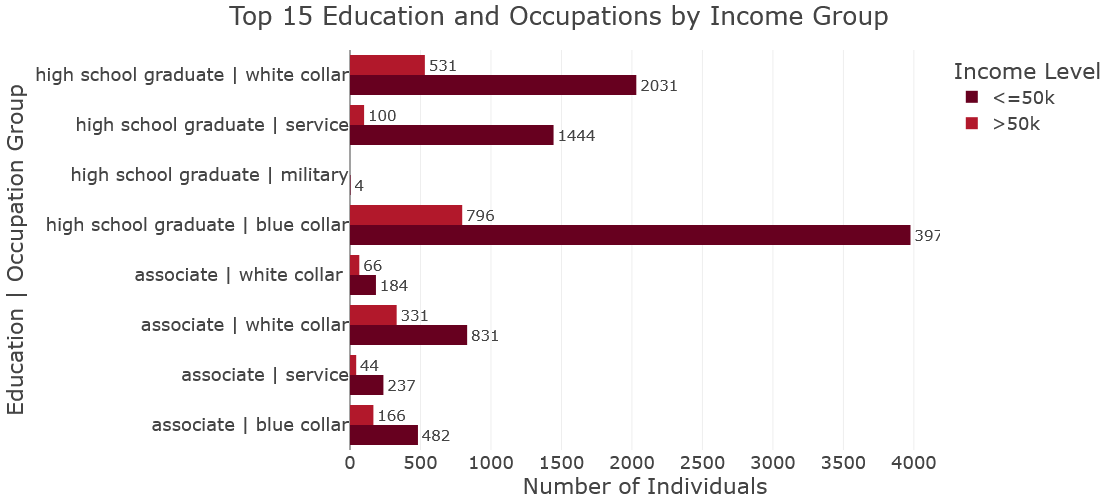

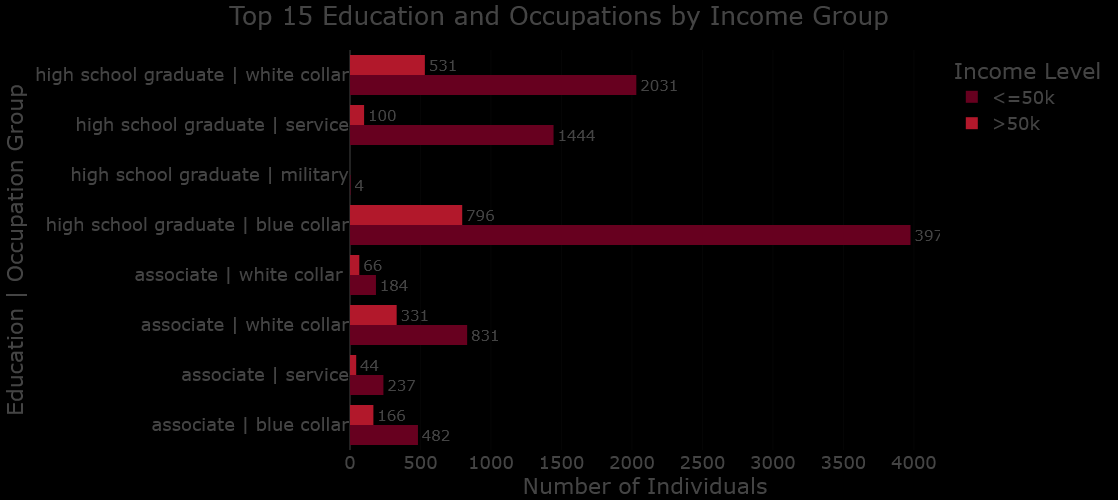

In [116]:
num = 15
adult_df_combos = adult_df_income_educ_occ.head(num)

fig = px.bar(
    adult_df_combos,
    x='total_income_distr',
    y='edu_occ',
    color='income',
    orientation='h',
    title=f'Top {num} Education and Occupations by Income Group',
    barmode='group',
    height=500,

    color_discrete_sequence=px.colors.sequential.RdBu,
    text='total_income_distr'
)

fig.update_layout(
    template='presentation',
    xaxis_title='Number of Individuals',
    yaxis_title='Education | Occupation Group',
    legend_title=dict(text='Income Level'),
    margin=dict(l=350, r=50, t=50, b=50)  # fixed typo here
)

fig.update_traces(textposition='outside')
fig.show()
fig.update_layout(template='presentation', paper_bgcolor='rgb(0, 0, 0)', plot_bgcolor='rgb(0, 0, 0)')

# Save in multiple formats
fig.write_image(os.path.join(results_dir, 'income_distribution_by_eduandocc_bar_plot.jpg'))
fig.write_image(os.path.join(results_dir, 'income_distribution_by_eduandocc_bar_plot.png'))
fig.write_html(os.path.join(results_dir, 'income_distribution_by_eduandocc_bar_plot.html'))

fig.show()

